In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/20220302Full-tilt-quaternion.csv')

In [3]:
df

,Frame,Sub Frame,Diabolo-RX,Diabolo-RY,Diabolo-RZ,Diabolo-RW,Diabolo-TX,Diabolo-TY,Diabolo-TZ,stick_left-RX,...,stick_left-TX,stick_left-TY,stick_left-TZ,stick_right-RX,stick_right-RY,stick_right-RZ,stick_right-RW,stick_right-TX,stick_right-TY,stick_right-TZ
0,1,0,-0.006135,0.007325,-0.031293,0.999465,-310.272583,-129.305557,65.749794,0.246065,...,-477.500244,-54.734776,50.309582,-0.597939,-0.182172,-0.261610,0.735420,-131.051636,-76.998955,67.883156
1,2,0,-0.005916,0.006262,-0.031640,0.999462,-310.095978,-129.277588,65.722679,0.247727,...,-477.058990,-54.773312,50.395802,-0.598160,-0.182313,-0.261365,0.735292,-131.155045,-76.995445,67.812294
2,3,0,-0.006639,0.005939,-0.031145,0.999475,-310.009796,-129.425705,65.756783,0.246903,...,-477.079437,-54.737595,50.722775,-0.598352,-0.182590,-0.261153,0.735143,-131.213913,-77.013405,67.669174
3,4,0,-0.006646,0.006182,-0.031182,0.999473,-310.046906,-129.407166,65.769783,0.246696,...,-477.232666,-54.740189,50.628773,-0.598064,-0.182726,-0.261483,0.735225,-131.188538,-77.016144,67.760002
4,5,0,-0.006148,0.006204,-0.031305,0.999472,-310.044128,-129.314667,65.745834,0.244635,...,-478.046143,-54.682487,50.147579,-0.597989,-0.182393,-0.261211,0.735466,-131.197281,-77.019943,67.813347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43056,43057,0,0.011548,-0.002838,-0.114254,-0.993380,-328.436401,27.058401,66.645851,-0.506838,...,-615.826355,-131.333832,49.136417,-0.117227,-0.641065,0.530031,0.542550,-687.092773,-12.182689,58.297508
43057,43058,0,0.011399,-0.003904,-0.114382,-0.993364,-328.642548,27.035505,66.593384,-0.506727,...,-615.738159,-131.374451,49.144062,-0.116964,-0.642123,0.529306,0.542064,-687.189209,-12.276341,57.844429
43058,43059,0,0.011430,-0.003868,-0.114597,-0.993339,-328.628052,27.044163,66.595894,-0.505807,...,-616.107117,-131.073853,49.263046,-0.117300,-0.641581,0.529391,0.542549,-687.190674,-12.135159,58.108742
43059,43060,0,0.011909,-0.002532,-0.114257,-0.993377,-328.373596,26.958817,66.665848,-0.506088,...,-615.959351,-131.232727,49.359116,-0.116961,-0.641444,0.529425,0.542752,-687.200317,-12.142201,58.162632


In [4]:
import math

def convert_to_eular(df, x_col, y_col, z_col, w_col):
    roll = []
    pitch = []
    yaw = []
    for i in range(len(df)):
        q = df.iloc[i]
        # roll (x-axis rotation)
        sinr_cosp = 2 * (q[w_col] * q[x_col] + q[y_col] * q[z_col])
        cosr_cosp = 1 - 2 * (q[x_col] * q[x_col] + q[y_col] * q[y_col])
        roll.append(math.atan2(sinr_cosp, cosr_cosp))

        # pitch (y-axis rotation)
        sinp = 2 * (q[w_col] * q[y_col] - q[z_col] * q[x_col])
        if abs(sinp) >= 1:
            pitch.append(math.copysign(math.pi / 2, sinp)); # use 90 degrees if out of range
        else:
            pitch.append(math.asin(sinp))

        # yaw (z-axis rotation)
        siny_cosp = 2 * (q[w_col] * q[z_col] + q[x_col] * q[y_col])
        cosy_cosp = 1 - 2 * (q[y_col] * q[y_col] + q[z_col] * q[z_col])
        yaw.append(math.atan2(siny_cosp, cosy_cosp))
    df[x_col] = np.array(roll)
    df[y_col] = np.array(pitch)
    df[z_col] = np.array(yaw)

    del df[w_col]

In [5]:
#convert_to_eular(df, 'Diabolo-RX', 'Diabolo-RY', 'Diabolo-RZ', 'Diabolo-RW')
#convert_to_eular(df, 'stick_left-RX', 'stick_left-RY', 'stick_left-RZ', 'stick_left-RW')
#convert_to_eular(df, 'stick_right-RX', 'stick_right-RY', 'stick_right-RZ', 'stick_right-RW')

In [6]:
#df.to_csv('processed_for_website/20220302Full-tilt-quaternion_converted.csv')

In [7]:
import matplotlib.pyplot as plt

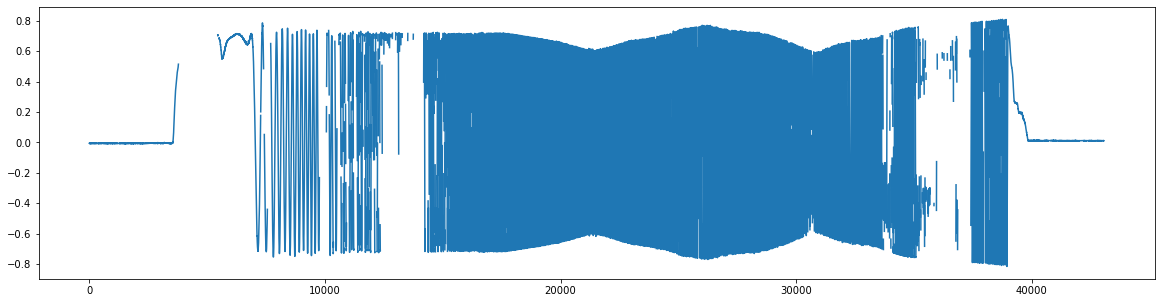

In [8]:
plt.figure(figsize=(20,5))
plt.plot(list(range(len(df['Diabolo-RX']))), df['Diabolo-RX'])

In [9]:
from pyquaternion import Quaternion
import vectormath as vmath

In [10]:
class MyQuaternion(Quaternion):
    @property
    def w(self):
        return self.q[0]
    @w.setter
    def w(self, value):
        self.q[0] = value
    @property
    def x(self):
        return self.q[1]
    @x.setter
    def x(self, value):
        self.q[1] = value
    @property
    def y(self):
        return self.q[2]
    @y.setter
    def y(self, value):
        self.q[2] = value
    @property
    def z(self):
        return self.q[3]
    @z.setter
    def z(self, value):
        self.q[3] = value

    def toEuler(self):
        # roll (x-axis rotation)
        sinr_cosp = 2 * (self.w * self.x + self.y * self.z)
        cosr_cosp = 1 - 2 * (self.x * self.x + self.y * self.y)
        roll = math.atan2(sinr_cosp, cosr_cosp)

        # pitch (y-axis rotation)
        sinp = 2 * (self.w * self.y - self.z * self.x)
        if (abs(sinp) >= 1):
            pitch = math.copysign(math.pi / 2, sinp) # use 90 degrees if out of range
        else:
            pitch = math.asin(sinp)

        # yaw (z-axis rotation)
        siny_cosp = 2 * (self.w * self.z + self.x * self.y)
        cosy_cosp = 1 - 2 * (self.y * self.y + self.z * self.z)
        yaw = math.atan2(siny_cosp, cosy_cosp)

        return (roll, pitch, yaw)

In [18]:
first_line = df.iloc[0]
q = MyQuaternion(
    x=first_line['Diabolo-RX'],
    y=first_line['Diabolo-RY'],
    z=first_line['Diabolo-RZ'],
    w=first_line['Diabolo-RW'])

print(math.acos(vmath.Vector3(q.rotate([0,0,1])).dot(vmath.Vector3([1,0,0]))))


1.5557696464349844


In [35]:
pitch_angles = []
for i in range(len(df)):
    line = df.iloc[i]
    q = MyQuaternion(
        x=line['Diabolo-RX'],
        y=line['Diabolo-RY'],
        z=line['Diabolo-RZ'],
        w=line['Diabolo-RW'])

    direction_vector = vmath.Vector3(q.rotate([0,0,1]))
    horizontal_vector = vmath.Vector3(direction_vector[0], direction_vector[1], 0)
    horizontal_vector = horizontal_vector.normalize()

    pitch_angle = math.acos(direction_vector.dot(horizontal_vector))
    if (direction_vector[2]<=0):
        pitch_angle *= -1
    pitch_angles.append(pitch_angle)
    

In [65]:
offset_angles = []
for i in range(len(df)):
    line = df.iloc[i]

    q = MyQuaternion(
        x=line['Diabolo-RX'],
        y=line['Diabolo-RY'],
        z=line['Diabolo-RZ'],
        w=line['Diabolo-RW'])

    direction_vector = vmath.Vector3(q.rotate([0,0,1]))
    horizontal_vector = vmath.Vector3(direction_vector[0], direction_vector[1], 0)
    horizontal_vector = horizontal_vector.normalize()

    stick_right_vector = vmath.Vector3(
        line['stick_right-TX'],
        line['stick_right-TY'],
        line['stick_right-TZ']
    )
    stick_left_vector = vmath.Vector3(
        line['stick_left-TX'],
        line['stick_left-TY'],
        line['stick_left-TZ']
    )

    stick_diff_vector = stick_right_vector - stick_left_vector
    stick_diff_vector = vmath.Vector3(stick_diff_vector[0], stick_diff_vector[1], 0)
    stick_diff_vector = stick_diff_vector.normalize()

    offset_angle = math.pi/2 - math.acos(stick_diff_vector.dot(horizontal_vector))
    offset_angles.append(-offset_angle)

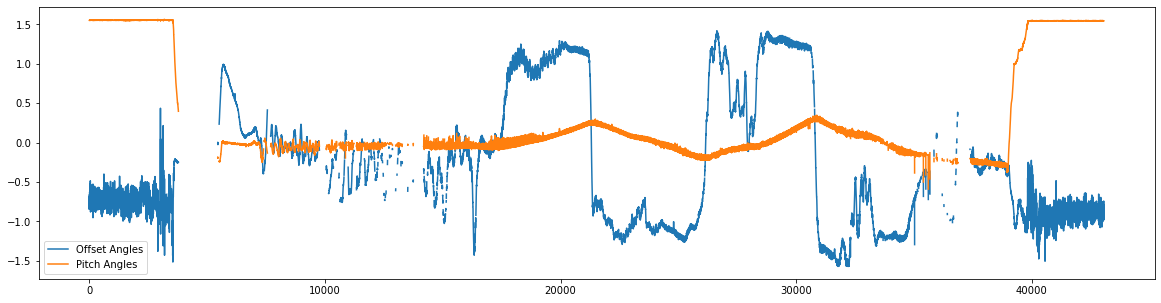

In [66]:
plt.figure(figsize=(20,5))
plt.plot(list(range(len(offset_angles))), offset_angles, label="Offset Angles")
plt.plot(list(range(len(pitch_angles))), pitch_angles, label="Pitch Angles")
plt.legend()

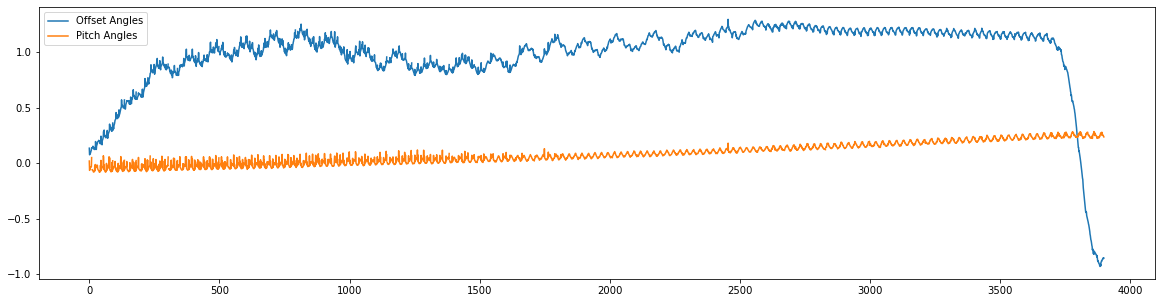

In [67]:
plt.figure(figsize=(20,5))
plt.plot(list(range(len(offset_angles[17500:21400]))), offset_angles[17500:21400], label="Offset Angles")
plt.plot(list(range(len(pitch_angles[17500:21400]))), pitch_angles[17500:21400], label="Pitch Angles")
plt.legend()

In [68]:
m = (pitch_angles[21400] - pitch_angles[17500]) / ((21400 - 17500)/600)
print(f"{m} rad/sec")
filtered_range = [angle for angle in offset_angles[17500:21400] if not math.isnan(angle)]
median_offset = np.median(filtered_range)
mean_offset = np.average(filtered_range)
print(f"offset median {median_offset} mean {mean_offset}")

print(m / median_offset)

0.031896487885972984 rad/sec
offset median 1.060843791648542 mean 0.9800593659117345
0.030067092004569418


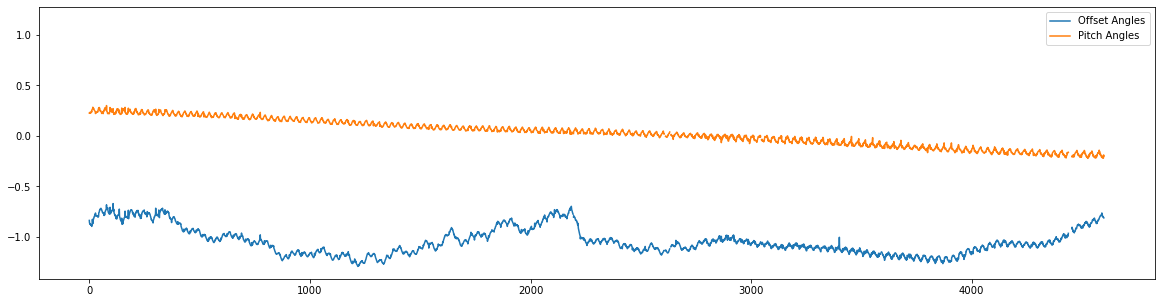

In [69]:
plt.figure(figsize=(20,5))
plt.plot(list(range(len(offset_angles[21400:26000]))), offset_angles[21400:26000], label="Offset Angles")
plt.plot(list(range(len(pitch_angles[21400:26000]))), pitch_angles[21400:26000], label="Pitch Angles")
plt.legend()

In [70]:
m = (pitch_angles[26000] - pitch_angles[21400]) / ((26000 - 21400)/600)
print(f"{m} rad/sec")
filtered_range = [angle for angle in offset_angles[21400:26000] if not math.isnan(angle)]
median_offset = np.median(filtered_range)
mean_offset = np.average(filtered_range)
print(f"offset median {median_offset} mean {mean_offset}")

print(m / median_offset)

-0.05335529617407097 rad/sec
offset median -1.0693218227989894 mean -1.0409843526614564
0.049896387632314014


In [71]:
print((0.049896387632314014 + 0.030067092004569418)/2)

0.03998173981844172
